# Desafio 1 - Maratona Behind the Code 2021

## 1. Exploração do dataset

O primeiro passo para o desenvolvimento de um bom modelo de Machine Learning é explorar bem os dados que temos para trabalhar. Devemos entender o melhor possível a relevância de cada dado para o valor que queremos predizer. Afinal, a predição do modelo é inteiramente baseada nos dados com que treinou.

Existem muitas bibliotecas em Python que podem ser utilizadas para tratamento e visualização de dados. Nesses exemplos, vamos usar Pandas, Seaborn e Matplotlib.

### 1.1 Importações das Bibliotecas

In [1]:
# Análise e manipulação
import pandas as pd
import numpy as np
import sys
# Visualizações
import matplotlib.pyplot as plt
import seaborn as sns
# Transformações e treinamentos
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
# Modelos para problemas de Classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
# Métricas de Classificação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

# IBM

# Importação do dataset
# import os, types
# from botocore.client import Config
# import ibm_boto3
# Submissão do desafio
# from ibm_watson_machine_learning import APIClient

### 1.2 Importação dos datasets

In [2]:
loans = pd.read_csv("LOANS.csv")
accounts = pd.read_csv("ACCOUNTS.CSV")
demographics = pd.read_csv("DEMOGRAPHICS.csv")

In [ ]:
def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_2132d677bb63455b8959b261ed2e9853 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_2132d677bb63455b8959b261ed2e9853 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_2132d677bb63455b8959b261ed2e9853 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8ouCa7KdhCoAUM7mv6HcGzl2n0Z5K5MoYPTqc7Zc9l59',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_2132d677bb63455b8959b261ed2e9853)

body = client_2132d677bb63455b8959b261ed2e9853.get_object(Bucket='desafio1bantotal2021-donotdelete-pr-bnovckcxfuffpe',Key='LOANS.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

loans = pd.read_csv(body)
display(loans.head())
display(loans.shape)

body = client_2132d677bb63455b8959b261ed2e9853.get_object(Bucket='desafio1bantotal2021-donotdelete-pr-bnovckcxfuffpe',Key='ACCOUNTS.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

accounts = pd.read_csv(body)
display(accounts.head())
display(accounts.shape)

body = client_2132d677bb63455b8959b261ed2e9853.get_object(Bucket='desafio1bantotal2021-donotdelete-pr-bnovckcxfuffpe',Key='DEMOGRAPHICS.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

demographics = pd.read_csv(body)
display(demographics.head())
display(demographics.shape)

### 1.2. Dicionário dos dados

Descrição de cada coluna presente no dataset:

    "ID"                         - número do identificador do cliente
    "CHECKING_BALANCE"           - Saldo que o cliente tem em sua conta
    "PAYMENT_TERM"               - Número de dias que o cliente tem para pagar o empréstimo
    "CREDIT_HISTORY"             - Situação de crédito anterior do cliente
    "LOAN_PURPOSE"               - Motivo do empréstimo
    "LOAN_AMOUNT"                - Montante do empréstimo
    "EXISTING_SAVINGS"           - saldo da conta poupança
    "EMPLOYMENT_DURATION"        - Há quantos anos o cliente está empregado
    "INSTALLMENT_PERCENT"        - Valor das parcelas em que o empréstimo deve ser pago
    "SEX"                        - sexo do cliente
    "OTHERS_ON_LOAN"             - Denota a existência de um fiador ou outro solicitante de empréstimo
    "CURRENT_RESIDENCE_DURATION" - anos que o cliente está em sua última residência
    "PROPRIETY"                  - Indica se o cliente possui alguma propriedade em seu nome
    "AGE"                        - idade do cliente
    "INSTALLMENT_PLANS"          - Plano de financiamento, que pode ser bancário, externo ou nenhum
    "HABILITY"                   - Indica se o cliente é dono de casa própria
    "EXISTING_CREDITS_COUNT"     - Número de empréstimos concedidos ao cliente no passado
    "JOB_TYPE"                   - Tipo de emprego: 0 - desempregado, 1 - não qualificado, 2 - autônomo, 3 - qualificado
    "DEPENDENTS"                 - Número de pessoas com acesso à conta
    "TELEPHONE"                  - Indica se o cliente possui um número de telefone cadastrado
    "FOREIGN_WORKER"             - Indica se o cliente trabalha em um país fora do banco

In [3]:
ld = pd.merge(loans, demographics, on="ID", how="left")
df = pd.merge(ld, accounts, on="ID", how = 'left')

### 1.3 Dataset ACCOUNTS

In [4]:
df.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION,EXISTING_CREDITS_COUNT
count,3.999000e+03,3975.000000,3974.000000,3981.000000,3999.000000,3918.000000,3910.000000,3915.000000,3915.000000,3909.000000,3923.000000,3917.000000,2463.000000
mean,6.603562e+05,653.796981,2.981379,3479.168802,0.664166,36.032925,2.429923,1.161175,0.412005,0.975697,4.238848,2.865458,1.469752
std,3.728332e+05,338.723239,1.121448,2489.961917,0.472340,10.617743,0.931842,0.367739,0.492259,0.154008,3.595680,1.115873,0.569142
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.418460e+05,390.000000,2.000000,1330.000000,0.000000,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000
50%,6.670610e+05,651.000000,3.000000,3237.000000,1.000000,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000,1.000000
75%,9.778745e+05,899.000000,4.000000,5334.000000,1.000000,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000,2.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000,3.000000


In [5]:
df.describe(include = 'O')

,INSTALLMENT_PLANS,LOAN_PURPOSE,OTHERS_ON_LOAN,SEX,PROPERTY,HOUSING,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS
count,3978,3979,3977,3920,3918,3912,2467,2462,2467
unique,3,11,3,2,4,3,1396,5,2238
top,NONE,CAR_NEW,NONE,M,SAVINGS_INSURANCE,OWN,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN
freq,2782,748,3306,2419,1302,2506,988,848,176


#### 1.3.1 Valores faltantes

In [6]:
print("Valores nulos antes da transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes da transformação: 

ID                               0
PAYMENT_TERM                    24
INSTALLMENT_PLANS               21
INSTALLMENT_PERCENT             25
LOAN_PURPOSE                    20
LOAN_AMOUNT                     18
OTHERS_ON_LOAN                  22
ALLOW                            0
SEX                             79
AGE                             81
JOB_TYPE                        89
DEPENDENTS                      84
TELEPHONE                       84
FOREIGN_WORKER                  90
EMPLOYMENT_DURATION             76
PROPERTY                        81
HOUSING                         87
CURRENT_RESIDENCE_DURATION      82
CHECKING_BALANCE              1532
CREDIT_HISTORY                1537
EXISTING_SAVINGS              1532
EXISTING_CREDITS_COUNT        1536
dtype: int64



In [7]:
df['CHECKING_BALANCE'].value_counts()

NO_CHECKING    988
0               71
42.83            3
97.41            3
-139.48          2
              ... 
86.69            1
-258.67          1
-176.43          1
5227.39          1
8243.55          1
Name: CHECKING_BALANCE, Length: 1396, dtype: int64

In [8]:
df['CREDIT_HISTORY'].value_counts()

PRIOR_PAYMENTS_DELAYED    848
CREDITS_PAID_TO_DATE      725
OUTSTANDING_CREDIT        453
ALL_CREDITS_PAID_BACK     375
NO_CREDITS                 61
Name: CREDIT_HISTORY, dtype: int64

In [9]:
df['EXISTING_SAVINGS'].value_counts()

UNKNOWN    176
28.92        3
100.89       3
16.4         2
28.88        2
          ... 
8.26         1
400.64       1
852.24       1
558.92       1
6.83         1
Name: EXISTING_SAVINGS, Length: 2238, dtype: int64

In [10]:
df['EXISTING_CREDITS_COUNT'].value_counts()

1.0    1398
2.0     973
3.0      92
Name: EXISTING_CREDITS_COUNT, dtype: int64

In [11]:
# Trocando pelo valor mais frequente
df = df.fillna(value = {'CHECKING_BALANCE': 'UNKNOWN', 
                                    'CREDIT_HISTORY': 'NO_CREDITS', 
                                    'EXISTING_SAVINGS': 'UNKNOWN',
                                    'EXISTING_CREDITS_COUNT': 1.0})

In [12]:
print("Valores nulos após a transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos após a transformação: 

ID                             0
PAYMENT_TERM                  24
INSTALLMENT_PLANS             21
INSTALLMENT_PERCENT           25
LOAN_PURPOSE                  20
LOAN_AMOUNT                   18
OTHERS_ON_LOAN                22
ALLOW                          0
SEX                           79
AGE                           81
JOB_TYPE                      89
DEPENDENTS                    84
TELEPHONE                     84
FOREIGN_WORKER                90
EMPLOYMENT_DURATION           76
PROPERTY                      81
HOUSING                       87
CURRENT_RESIDENCE_DURATION    82
CHECKING_BALANCE               0
CREDIT_HISTORY                 0
EXISTING_SAVINGS               0
EXISTING_CREDITS_COUNT         0
dtype: int64



#### 1.3.2 Verificação e tratamento do tipo das colunas

In [13]:
df.sample()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW,SEX,AGE,...,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
3891,914380,120.0,NONE,2.0,RADIO_TV,2561.0,NONE,1,F,29.0,...,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0,10.3,ALL_CREDITS_PAID_BACK,85.28,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3999 non-null   int64  
 1   PAYMENT_TERM                3975 non-null   float64
 2   INSTALLMENT_PLANS           3978 non-null   object 
 3   INSTALLMENT_PERCENT         3974 non-null   float64
 4   LOAN_PURPOSE                3979 non-null   object 
 5   LOAN_AMOUNT                 3981 non-null   float64
 6   OTHERS_ON_LOAN              3977 non-null   object 
 7   ALLOW                       3999 non-null   int64  
 8   SEX                         3920 non-null   object 
 9   AGE                         3918 non-null   float64
 10  JOB_TYPE                    3910 non-null   float64
 11  DEPENDENTS                  3915 non-null   float64
 12  TELEPHONE                   3915 non-null   float64
 13  FOREIGN_WORKER              3909 

Podemos observar que algumas colunas nós podemos realizar a alteração do tipo, como nas colunas a seguir:

    CHECKING_BALANCE - de NO_CHECKING e UNKNOWN para 0
    EXISTING_SAVINGS - De UNKNOWN para 0

In [15]:
df.loc[df['CHECKING_BALANCE'] == "UNKNOWN", 'CHECKING_BALANCE'] = 'NO_CHECKING'

In [16]:
df['CHECKING'] = df.loc[df['CHECKING_BALANCE'] == "NO_CHECKING", 'CHECKING_BALANCE']

In [17]:
df['CHECKING'].value_counts()

NO_CHECKING    2520
Name: CHECKING, dtype: int64

In [18]:
df = df.fillna(value = {'CHECKING': 'CHECKING'})

In [19]:
df['CHECKING'].value_counts()

NO_CHECKING    2520
CHECKING       1479
Name: CHECKING, dtype: int64

In [20]:
df['EXISTING_SAVINGS'].value_counts()

UNKNOWN    1708
28.92         3
100.89        3
16.4          2
28.88         2
           ... 
8.26          1
400.64        1
852.24        1
558.92        1
6.83          1
Name: EXISTING_SAVINGS, Length: 2238, dtype: int64

In [21]:
df.loc[df['CHECKING_BALANCE'] == "NO_CHECKING", 'CHECKING_BALANCE'] = 0
df.loc[df['EXISTING_SAVINGS'] == "UNKNOWN", 'EXISTING_SAVINGS'] = 0

In [22]:
df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].astype(float)
df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].astype(float)

#### 1.3.3 Verificação de dados inconsistentes

In [23]:
df.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
count,3.999000e+03,3975.000000,3974.000000,3981.000000,3999.000000,3918.000000,3910.000000,3915.000000,3915.000000,3909.000000,3923.000000,3917.000000,3999.000000,3999.000000,3999.000000
mean,6.603562e+05,653.796981,2.981379,3479.168802,0.664166,36.032925,2.429923,1.161175,0.412005,0.975697,4.238848,2.865458,191.636574,782.220998,1.289322
std,3.728332e+05,338.723239,1.121448,2489.961917,0.472340,10.617743,0.931842,0.367739,0.492259,0.154008,3.595680,1.115873,1714.194189,3668.728044,0.501687
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-2797.250000,0.000000,1.000000
25%,3.418460e+05,390.000000,2.000000,1330.000000,0.000000,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000
50%,6.670610e+05,651.000000,3.000000,3237.000000,1.000000,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000,0.000000,33.560000,1.000000
75%,9.778745e+05,899.000000,4.000000,5334.000000,1.000000,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000,0.000000,377.005000,2.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000,28041.160000,50177.310000,3.000000


Dados que são considerados como outliers:

- ``CHECKING_BALANCE`` possui um valor máximo de 28041.1
- ``EXISTING_SAVINGS`` possui um valor máximo de 50177.3	

Filtros realizados:

    -2795 até 0     - <=0
    -do 0 até o fim - >0

accounts_test = accounts_test[accounts_test.CHECKING_BALANCE > 0]
accounts_test['CHECKING_BALANCE'] = pd.cut(accounts_test['CHECKING_BALANCE'], 
                    bins = [-2795, 0, 1000, sys.maxsize], 
                    labels = ['<=0', '>0', 'Altos valores'])

accounts_test['CHECKING_BALANCE'] = accounts_test['CHECKING_BALANCE'].astype(object)

In [24]:
df.groupby('CHECKING_BALANCE').agg({'CHECKING_BALANCE': 'count'})

,CHECKING_BALANCE
CHECKING_BALANCE,
-2797.25,1
-2617.35,1
-2582.29,1
-2531.05,1
-2347.87,1
...,...
17391.41,1
17525.50,1
18814.19,1


count     3999.000000
mean       191.636574
std       1714.194189
min      -2797.250000
25%          0.000000
50%          0.000000
75%          0.000000
max      28041.160000
Name: CHECKING_BALANCE, dtype: float64

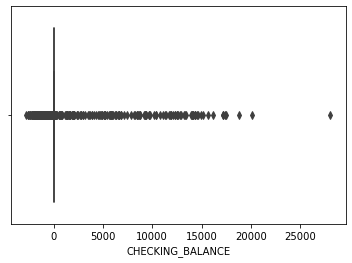

In [25]:
display(df['CHECKING_BALANCE'].describe())

sns.boxplot(x=df["CHECKING_BALANCE"])

count     3989.000000
mean       146.185688
std       1445.156506
min      -2797.250000
25%          0.000000
50%          0.000000
75%          0.000000
max      14928.780000
Name: CHECKING_BALANCE, dtype: float64

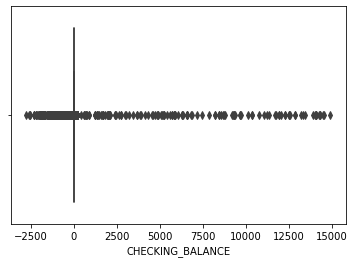

In [26]:
df = df[df.CHECKING_BALANCE <= 15000]

display(df['CHECKING_BALANCE'].describe())

sns.boxplot(x=df["CHECKING_BALANCE"])

In [27]:
df['CHECKING_BALANCE_DP'] = pd.cut(df['CHECKING_BALANCE'], 
                    bins = [-sys.maxsize -1, -1, 0, sys.maxsize], 
                    labels = ['Negativo', 'Zerado', 'Positivo'])

df['CHECKING_BALANCE_DP'] = df['CHECKING_BALANCE_DP'].astype(object)

# agrupando por número de acomodações
df.groupby('CHECKING_BALANCE_DP').agg({'CHECKING_BALANCE_DP': 'count'})

,CHECKING_BALANCE_DP
CHECKING_BALANCE_DP,
Negativo,683
Positivo,713
Zerado,2593


count     3989.000000
mean       781.360637
std       3672.026085
min          0.000000
25%          0.000000
50%         33.520000
75%        376.400000
max      50177.310000
Name: EXISTING_SAVINGS, dtype: float64

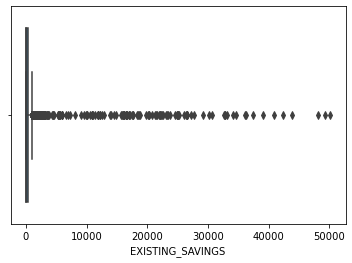

In [28]:
display(df['EXISTING_SAVINGS'].describe())

sns.boxplot(x=df["EXISTING_SAVINGS"])

count     3971.000000
mean       612.445749
std       2654.301650
min          0.000000
25%          0.000000
50%         32.720000
75%        364.845000
max      29203.900000
Name: EXISTING_SAVINGS, dtype: float64

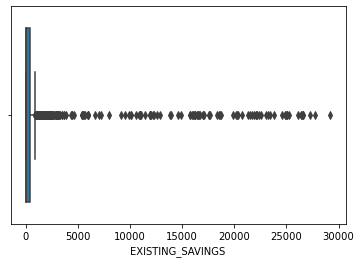

In [29]:
df = df[df.EXISTING_SAVINGS <= 30000]

display(df['EXISTING_SAVINGS'].describe())

sns.boxplot(x=df["EXISTING_SAVINGS"])

### 1.4 Dataset DEMOGRAPHICS

In [30]:
df.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
count,3.971000e+03,3947.000000,3946.000000,3953.000000,3971.000000,3890.000000,3882.000000,3887.000000,3887.000000,3881.000000,3895.000000,3889.000000,3971.000000,3971.000000,3971.000000
mean,6.602624e+05,652.303015,2.978966,3472.713129,0.665827,35.994859,2.429418,1.160792,0.410342,0.975779,4.226187,2.862947,143.100859,612.445749,1.287081
std,3.727368e+05,337.994364,1.122108,2489.348994,0.471760,10.633494,0.931451,0.367387,0.491959,0.153753,3.594771,1.116417,1438.437579,2654.301650,0.500561
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-2797.250000,0.000000,1.000000
25%,3.418460e+05,390.000000,2.000000,1328.000000,0.000000,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000
50%,6.672140e+05,651.000000,3.000000,3229.000000,1.000000,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000,0.000000,32.720000,1.000000
75%,9.766990e+05,899.000000,4.000000,5317.000000,1.000000,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000,0.000000,364.845000,2.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000,14928.780000,29203.900000,3.000000


In [31]:
df.describe(include = 'O')

,INSTALLMENT_PLANS,LOAN_PURPOSE,OTHERS_ON_LOAN,SEX,PROPERTY,HOUSING,CREDIT_HISTORY,CHECKING,CHECKING_BALANCE_DP
count,3950,3951,3949,3892,3890,3884,3971,3971,3971
unique,3,11,3,2,4,3,5,2,3
top,NONE,CAR_NEW,NONE,M,SAVINGS_INSURANCE,OWN,NO_CREDITS,NO_CHECKING,Zerado
freq,2764,747,3288,2403,1295,2482,1597,2508,2581


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3998
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3971 non-null   int64  
 1   PAYMENT_TERM                3947 non-null   float64
 2   INSTALLMENT_PLANS           3950 non-null   object 
 3   INSTALLMENT_PERCENT         3946 non-null   float64
 4   LOAN_PURPOSE                3951 non-null   object 
 5   LOAN_AMOUNT                 3953 non-null   float64
 6   OTHERS_ON_LOAN              3949 non-null   object 
 7   ALLOW                       3971 non-null   int64  
 8   SEX                         3892 non-null   object 
 9   AGE                         3890 non-null   float64
 10  JOB_TYPE                    3882 non-null   float64
 11  DEPENDENTS                  3887 non-null   float64
 12  TELEPHONE                   3887 non-null   float64
 13  FOREIGN_WORKER              3881 

#### 1.4.1 Valores faltantes

In [33]:
print("Valores nulos antes da transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes da transformação: 

ID                             0
PAYMENT_TERM                  24
INSTALLMENT_PLANS             21
INSTALLMENT_PERCENT           25
LOAN_PURPOSE                  20
LOAN_AMOUNT                   18
OTHERS_ON_LOAN                22
ALLOW                          0
SEX                           79
AGE                           81
JOB_TYPE                      89
DEPENDENTS                    84
TELEPHONE                     84
FOREIGN_WORKER                90
EMPLOYMENT_DURATION           76
PROPERTY                      81
HOUSING                       87
CURRENT_RESIDENCE_DURATION    82
CHECKING_BALANCE               0
CREDIT_HISTORY                 0
EXISTING_SAVINGS               0
EXISTING_CREDITS_COUNT         0
CHECKING                       0
CHECKING_BALANCE_DP            0
dtype: int64



In [34]:
df['SEX'].value_counts()

M    2403
F    1489
Name: SEX, dtype: int64

In [35]:
df['AGE'].value_counts()

19.0    318
36.0    138
40.0    134
37.0    133
31.0    132
34.0    129
41.0    127
33.0    126
39.0    123
42.0    122
32.0    122
28.0    120
38.0    120
29.0    115
30.0    114
45.0    106
43.0    106
35.0    104
46.0    101
27.0    100
44.0     98
47.0     96
26.0     93
24.0     86
25.0     79
48.0     76
49.0     75
22.0     71
50.0     68
20.0     62
21.0     61
51.0     61
23.0     60
52.0     56
53.0     48
54.0     45
55.0     41
56.0     24
57.0     23
58.0     19
60.0     15
59.0     15
61.0      7
65.0      5
63.0      3
66.0      3
62.0      3
74.0      2
64.0      2
73.0      1
67.0      1
70.0      1
Name: AGE, dtype: int64

In [36]:
df['JOB_TYPE'].value_counts()

3.0    2646
1.0     521
2.0     486
0.0     229
Name: JOB_TYPE, dtype: int64

In [37]:
df['DEPENDENTS'].value_counts()

1.0    3262
2.0     625
Name: DEPENDENTS, dtype: int64

In [38]:
df['TELEPHONE'].value_counts()

0.0    2292
1.0    1595
Name: TELEPHONE, dtype: int64

In [39]:
df['FOREIGN_WORKER'].value_counts()

1.0    3787
0.0      94
Name: FOREIGN_WORKER, dtype: int64

In [40]:
df['EMPLOYMENT_DURATION'].value_counts()

0.0     927
5.0     386
7.0     368
6.0     346
1.0     313
3.0     286
2.0     275
4.0     274
8.0     191
9.0     179
10.0    141
11.0     89
12.0     72
13.0     23
14.0     11
15.0     10
16.0      2
18.0      1
17.0      1
Name: EMPLOYMENT_DURATION, dtype: int64

In [41]:
df['PROPERTY'].value_counts()

SAVINGS_INSURANCE    1295
CAR_OTHER            1196
REAL_ESTATE           846
UNKNOWN               553
Name: PROPERTY, dtype: int64

In [42]:
df['HOUSING'].value_counts()

OWN     2482
RENT     827
FREE     575
Name: HOUSING, dtype: int64

In [43]:
df['CURRENT_RESIDENCE_DURATION'].value_counts()

3.0    1295
2.0     980
4.0     844
1.0     485
5.0     282
6.0       3
Name: CURRENT_RESIDENCE_DURATION, dtype: int64

In [44]:
# Trocando pelo valor mais frequente
df = df.fillna(value = {'SEX': 'M', 
                        'AGE': 19.0, 
                        'JOB_TYPE': 3.0,
                        'DEPENDENTS': 1.0,
                        'TELEPHONE': 0.0,
                        'FOREIGN_WORKER': 1.0, 
                        'EMPLOYMENT_DURATION': 0.0,
                        'PROPERTY': 'UNKNOWN', 
                        'HOUSING': 'OWN',
                        'CURRENT_RESIDENCE_DURATION': 3.0})

In [45]:
print("Valores nulos após a transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos após a transformação: 

ID                             0
PAYMENT_TERM                  24
INSTALLMENT_PLANS             21
INSTALLMENT_PERCENT           25
LOAN_PURPOSE                  20
LOAN_AMOUNT                   18
OTHERS_ON_LOAN                22
ALLOW                          0
SEX                            0
AGE                            0
JOB_TYPE                       0
DEPENDENTS                     0
TELEPHONE                      0
FOREIGN_WORKER                 0
EMPLOYMENT_DURATION            0
PROPERTY                       0
HOUSING                        0
CURRENT_RESIDENCE_DURATION     0
CHECKING_BALANCE               0
CREDIT_HISTORY                 0
EXISTING_SAVINGS               0
EXISTING_CREDITS_COUNT         0
CHECKING                       0
CHECKING_BALANCE_DP            0
dtype: int64



#### 1.3.2 Verificação e tratamento do tipo das colunas

In [46]:
df.sample()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW,SEX,AGE,...,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,CHECKING,CHECKING_BALANCE_DP
57,558052,279.0,NONE,2.0,CAR_NEW,2274.0,NONE,0,M,19.0,...,0.0,UNKNOWN,OWN,3.0,0.0,NO_CREDITS,0.0,1.0,NO_CHECKING,Zerado


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3998
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3971 non-null   int64  
 1   PAYMENT_TERM                3947 non-null   float64
 2   INSTALLMENT_PLANS           3950 non-null   object 
 3   INSTALLMENT_PERCENT         3946 non-null   float64
 4   LOAN_PURPOSE                3951 non-null   object 
 5   LOAN_AMOUNT                 3953 non-null   float64
 6   OTHERS_ON_LOAN              3949 non-null   object 
 7   ALLOW                       3971 non-null   int64  
 8   SEX                         3971 non-null   object 
 9   AGE                         3971 non-null   float64
 10  JOB_TYPE                    3971 non-null   float64
 11  DEPENDENTS                  3971 non-null   float64
 12  TELEPHONE                   3971 non-null   float64
 13  FOREIGN_WORKER              3971 

Podemos observar que algumas colunas nós podemos realizar a alteração do tipo, como nas colunas a seguir:

    AGE - Alteração para o tipo object (realizarei um filtro)
    JOB_TYPE - Alteração para o tipo int
    DEPENDENTS - Alteração para o tipo int
    TELEPHONE - Alteração para o tipo int
    FOREIGN_WORKER - Alteração para o tipo int
    EMPLOYMENT_DURATION - Alteração para o tipo int
    CURRENT_RESIDENCE_DURATION - Alteração para o tipo int

In [48]:
# agrupando por número de acomodações
df.groupby('AGE').agg({'AGE': 'count'})

,AGE
AGE,
19.0,399
20.0,62
21.0,61
22.0,71
23.0,60
24.0,86
25.0,79
26.0,93
27.0,100


In [49]:
# Alteração para o tipo int da coluna JOB_TYPE
df['AGE'] = df['AGE'].astype(int)
# Alteração para o tipo int da coluna JOB_TYPE
df['JOB_TYPE'] = df['JOB_TYPE'].astype(int)
# Alteração para o tipo int da coluna DEPENDENTS
df['DEPENDENTS'] = df['DEPENDENTS'].astype(int)
# Alteração para o tipo int da coluna TELEPHONE
df['TELEPHONE'] = df['TELEPHONE'].astype(int)
# Alteração para o tipo int da coluna FOREIGN_WORKER
df['FOREIGN_WORKER'] = df['FOREIGN_WORKER'].astype(int)
# Alteração para o tipo int da coluna EMPLOYMENT_DURATION
df['EMPLOYMENT_DURATION'] = df['EMPLOYMENT_DURATION'].astype(int)
# Alteração para o tipo int da coluna CURRENT_RESIDENCE_DURATION
df['CURRENT_RESIDENCE_DURATION'] = df['CURRENT_RESIDENCE_DURATION'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3998
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3971 non-null   int64  
 1   PAYMENT_TERM                3947 non-null   float64
 2   INSTALLMENT_PLANS           3950 non-null   object 
 3   INSTALLMENT_PERCENT         3946 non-null   float64
 4   LOAN_PURPOSE                3951 non-null   object 
 5   LOAN_AMOUNT                 3953 non-null   float64
 6   OTHERS_ON_LOAN              3949 non-null   object 
 7   ALLOW                       3971 non-null   int64  
 8   SEX                         3971 non-null   object 
 9   AGE                         3971 non-null   int32  
 10  JOB_TYPE                    3971 non-null   int32  
 11  DEPENDENTS                  3971 non-null   int32  
 12  TELEPHONE                   3971 non-null   int32  
 13  FOREIGN_WORKER              3971 

#### 1.3.3 Verificação de dados inconsistentes

In [51]:
# agrupando por número de acomodações
df.groupby('AGE').agg({'AGE': 'count'})

,AGE
AGE,
19,399
20,62
21,61
22,71
23,60
24,86
25,79
26,93
27,100


In [52]:
df['AGE_FILTER'] = pd.cut(df['AGE'], 
                    bins = [0, 22, 27, 33, 40, 45, 55, sys.maxsize], 
                    labels = ['Curtindo a vida', 'Contas pra pagar', 
                              'De bem com a vida', 'Familia', 
                              'Barriga de chop', 'Cuidando da saúde', 
                              'Aposentado'])

df['AGE_FILTER'] = df['AGE_FILTER'].astype(object)

In [53]:
# agrupando por número de acomodações
df.groupby('AGE_FILTER').agg({'AGE_FILTER': 'count'})

,AGE_FILTER
AGE_FILTER,
Aposentado,124
Barriga de chop,559
Contas pra pagar,418
Cuidando da saúde,667
Curtindo a vida,593
De bem com a vida,729
Familia,881


### 1.5 Dataset LOANS

In [54]:
df.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
count,3.971000e+03,3947.000000,3946.000000,3953.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000,3971.000000
mean,6.602624e+05,652.303015,2.978966,3472.713129,0.665827,35.648199,2.442206,1.157391,0.401662,0.976328,4.145303,2.865777,143.100859,612.445749,1.287081
std,3.727368e+05,337.994364,1.122108,2489.348994,0.471760,10.795226,0.924817,0.364215,0.490296,0.152043,3.606989,1.104999,1438.437579,2654.301650,0.500561
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-2797.250000,0.000000,1.000000
25%,3.418460e+05,390.000000,2.000000,1328.000000,0.000000,27.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000
50%,6.672140e+05,651.000000,3.000000,3229.000000,1.000000,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000,0.000000,32.720000,1.000000
75%,9.766990e+05,899.000000,4.000000,5317.000000,1.000000,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000,0.000000,364.845000,2.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000,14928.780000,29203.900000,3.000000


In [55]:
df.describe(include = 'O')

,INSTALLMENT_PLANS,LOAN_PURPOSE,OTHERS_ON_LOAN,SEX,PROPERTY,HOUSING,CREDIT_HISTORY,CHECKING,CHECKING_BALANCE_DP,AGE_FILTER
count,3950,3951,3949,3971,3971,3971,3971,3971,3971,3971
unique,3,11,3,2,4,3,5,2,3,7
top,NONE,CAR_NEW,NONE,M,SAVINGS_INSURANCE,OWN,NO_CREDITS,NO_CHECKING,Zerado,Familia
freq,2764,747,3288,2482,1295,2569,1597,2508,2581,881


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3998
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3971 non-null   int64  
 1   PAYMENT_TERM                3947 non-null   float64
 2   INSTALLMENT_PLANS           3950 non-null   object 
 3   INSTALLMENT_PERCENT         3946 non-null   float64
 4   LOAN_PURPOSE                3951 non-null   object 
 5   LOAN_AMOUNT                 3953 non-null   float64
 6   OTHERS_ON_LOAN              3949 non-null   object 
 7   ALLOW                       3971 non-null   int64  
 8   SEX                         3971 non-null   object 
 9   AGE                         3971 non-null   int32  
 10  JOB_TYPE                    3971 non-null   int32  
 11  DEPENDENTS                  3971 non-null   int32  
 12  TELEPHONE                   3971 non-null   int32  
 13  FOREIGN_WORKER              3971 

#### 1.4.1 Valores faltantes

In [57]:
print("Valores nulos antes da transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes da transformação: 

ID                             0
PAYMENT_TERM                  24
INSTALLMENT_PLANS             21
INSTALLMENT_PERCENT           25
LOAN_PURPOSE                  20
LOAN_AMOUNT                   18
OTHERS_ON_LOAN                22
ALLOW                          0
SEX                            0
AGE                            0
JOB_TYPE                       0
DEPENDENTS                     0
TELEPHONE                      0
FOREIGN_WORKER                 0
EMPLOYMENT_DURATION            0
PROPERTY                       0
HOUSING                        0
CURRENT_RESIDENCE_DURATION     0
CHECKING_BALANCE               0
CREDIT_HISTORY                 0
EXISTING_SAVINGS               0
EXISTING_CREDITS_COUNT         0
CHECKING                       0
CHECKING_BALANCE_DP            0
AGE_FILTER                     0
dtype: int64



In [58]:
df['PAYMENT_TERM'].value_counts()

120.0     176
124.0     166
930.0     110
240.0      80
775.0      75
         ... 
1891.0      1
1710.0      1
1560.0      1
1984.0      1
1860.0      1
Name: PAYMENT_TERM, Length: 106, dtype: int64

In [59]:
df['INSTALLMENT_PLANS'].value_counts()

NONE      2764
STORES     808
BANK       378
Name: INSTALLMENT_PLANS, dtype: int64

In [60]:
df['INSTALLMENT_PERCENT'].value_counts()

3.0    1290
4.0     962
2.0     943
1.0     404
5.0     335
6.0      12
Name: INSTALLMENT_PERCENT, dtype: int64

In [61]:
df['LOAN_PURPOSE'].value_counts()

CAR_NEW       747
FURNITURE     685
CAR_USED      648
RADIO_TV      598
APPLIANCES    432
REPAIRS       226
VACATION      161
RETRAINING    129
EDUCATION     126
BUSINESS      113
OTHER          86
Name: LOAN_PURPOSE, dtype: int64

In [62]:
df['LOAN_AMOUNT'].value_counts()

250.0     575
1820.0      5
1993.0      5
2992.0      4
1395.0      4
         ... 
6585.0      1
1886.0      1
1292.0      1
6434.0      1
6172.0      1
Name: LOAN_AMOUNT, Length: 2779, dtype: int64

In [63]:
df['OTHERS_ON_LOAN'].value_counts()

NONE            3288
CO-APPLICANT     567
GUARANTOR         94
Name: OTHERS_ON_LOAN, dtype: int64

In [64]:
# Trocando pelo valor mais frequente
df = df.fillna(value = {'PAYMENT_TERM': 120.0, 
                              'INSTALLMENT_PLANS': 'NONE', 
                              'INSTALLMENT_PERCENT': 3.0,
                              'LOAN_PURPOSE': 'CAR_NEW',
                              'LOAN_AMOUNT': 250.0,
                              'OTHERS_ON_LOAN': 'NONE'})

In [65]:
print("Valores nulos após a transformação: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos após a transformação: 

ID                            0
PAYMENT_TERM                  0
INSTALLMENT_PLANS             0
INSTALLMENT_PERCENT           0
LOAN_PURPOSE                  0
LOAN_AMOUNT                   0
OTHERS_ON_LOAN                0
ALLOW                         0
SEX                           0
AGE                           0
JOB_TYPE                      0
DEPENDENTS                    0
TELEPHONE                     0
FOREIGN_WORKER                0
EMPLOYMENT_DURATION           0
PROPERTY                      0
HOUSING                       0
CURRENT_RESIDENCE_DURATION    0
CHECKING_BALANCE              0
CREDIT_HISTORY                0
EXISTING_SAVINGS              0
EXISTING_CREDITS_COUNT        0
CHECKING                      0
CHECKING_BALANCE_DP           0
AGE_FILTER                    0
dtype: int64



#### 1.3.2 Verificação e tratamento do tipo das colunas

In [66]:
df.sample()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW,SEX,AGE,...,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,CHECKING,CHECKING_BALANCE_DP,AGE_FILTER
2579,679305,868.0,NONE,3.0,FURNITURE,4048.0,NONE,1,M,24,...,SAVINGS_INSURANCE,OWN,2,1583.79,PRIOR_PAYMENTS_DELAYED,237.32,2.0,CHECKING,Positivo,Contas pra pagar


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3998
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3971 non-null   int64  
 1   PAYMENT_TERM                3971 non-null   float64
 2   INSTALLMENT_PLANS           3971 non-null   object 
 3   INSTALLMENT_PERCENT         3971 non-null   float64
 4   LOAN_PURPOSE                3971 non-null   object 
 5   LOAN_AMOUNT                 3971 non-null   float64
 6   OTHERS_ON_LOAN              3971 non-null   object 
 7   ALLOW                       3971 non-null   int64  
 8   SEX                         3971 non-null   object 
 9   AGE                         3971 non-null   int32  
 10  JOB_TYPE                    3971 non-null   int32  
 11  DEPENDENTS                  3971 non-null   int32  
 12  TELEPHONE                   3971 non-null   int32  
 13  FOREIGN_WORKER              3971 

Podemos observar que algumas colunas nós podemos realizar a alteração do tipo, como nas colunas a seguir:

    INSTALLMENT_PERCENT - Alteração para o tipo int

In [68]:
# Alteração para o tipo int da coluna INSTALLMENT_PERCENT
df['INSTALLMENT_PERCENT'] = df['INSTALLMENT_PERCENT'].astype(int)

### 2. Análise Exploratória dos dados

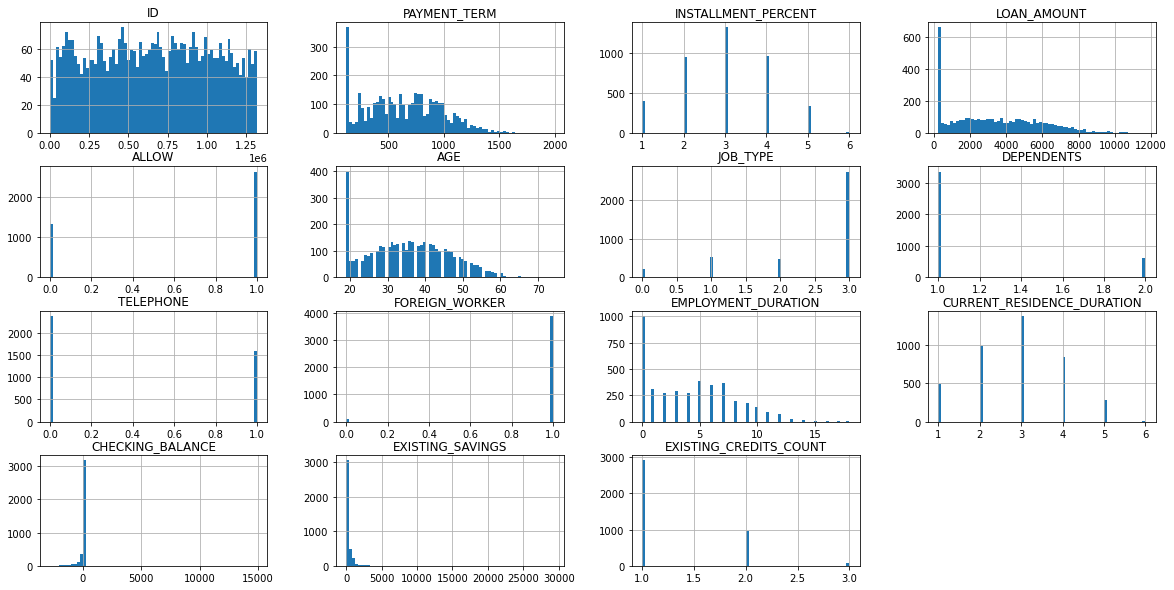

In [69]:
df.hist(bins = 70, figsize = (20, 10));

C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

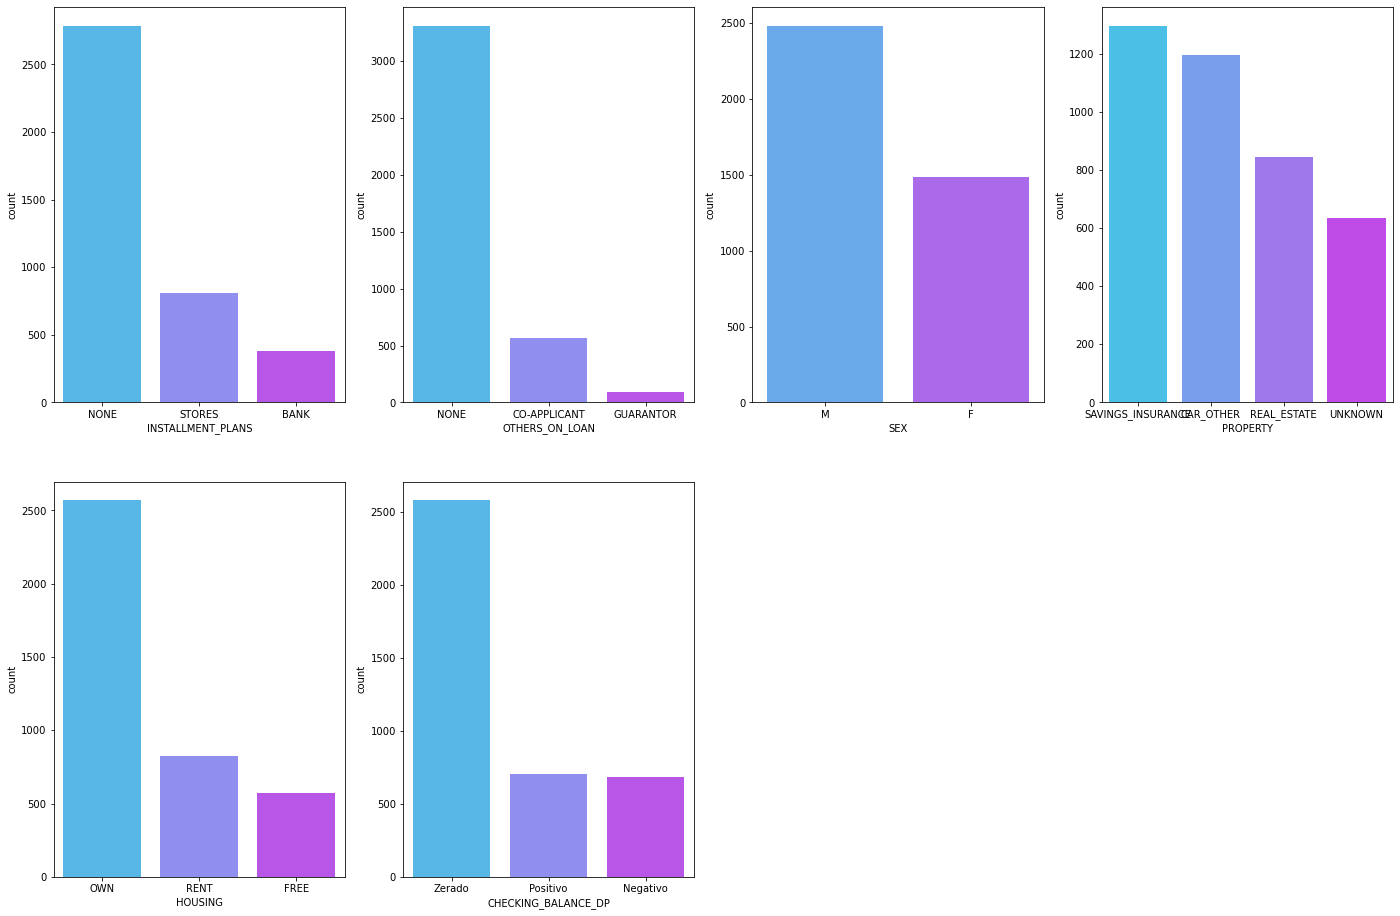

In [70]:
plt.figure(figsize = (24, 16))

plt.subplot(2, 4, 1)
sns.countplot(df['INSTALLMENT_PLANS'], order = df['INSTALLMENT_PLANS'].value_counts().index, palette = 'cool')
plt.subplot(2, 4, 2)
sns.countplot(df['OTHERS_ON_LOAN'], order = df['OTHERS_ON_LOAN'].value_counts().index, palette = 'cool')
plt.subplot(2, 4, 3)
sns.countplot(df['SEX'], order = df['SEX'].value_counts().index, palette = 'cool')
plt.subplot(2, 4, 4)
sns.countplot(df['PROPERTY'], order = df['PROPERTY'].value_counts().index, palette = 'cool')
plt.subplot(2, 4, 5)
sns.countplot(df['HOUSING'], order = df['HOUSING'].value_counts().index, palette = 'cool')
plt.subplot(2, 4, 6)
sns.countplot(df['CHECKING_BALANCE_DP'], order = df['CHECKING_BALANCE_DP'].value_counts().index, palette = 'cool')

C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


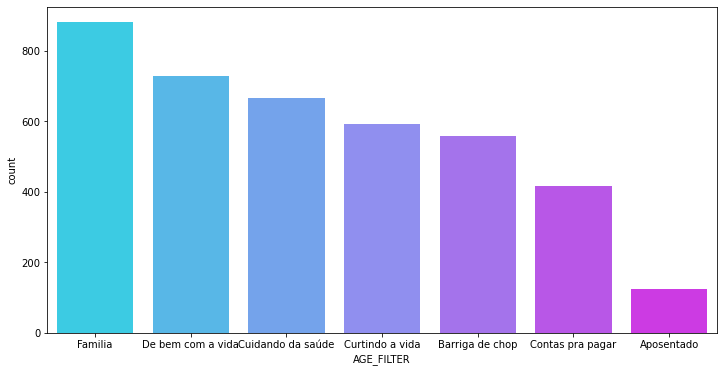

In [71]:
plt.figure(figsize = (12, 6))
sns.countplot(df['AGE_FILTER'], order = df['AGE_FILTER'].value_counts().index, palette = 'cool')

C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


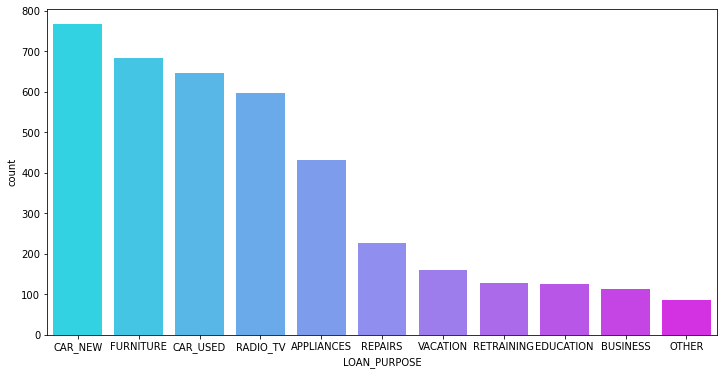

In [72]:
plt.figure(figsize = (12, 6))
sns.countplot(df['LOAN_PURPOSE'], order = df['LOAN_PURPOSE'].value_counts().index, palette = 'cool')

C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


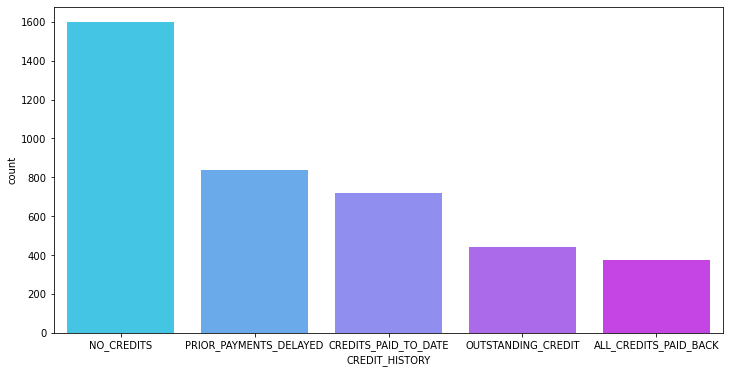

In [73]:
plt.figure(figsize = (12, 6))

sns.countplot(df['CREDIT_HISTORY'], order = df['CREDIT_HISTORY'].value_counts().index, palette = 'cool')

#### 2.1 Matriz de Correlação Bivariada

Text(0.5, 1.0, 'Mapa de Correlação das variáveis númericas')

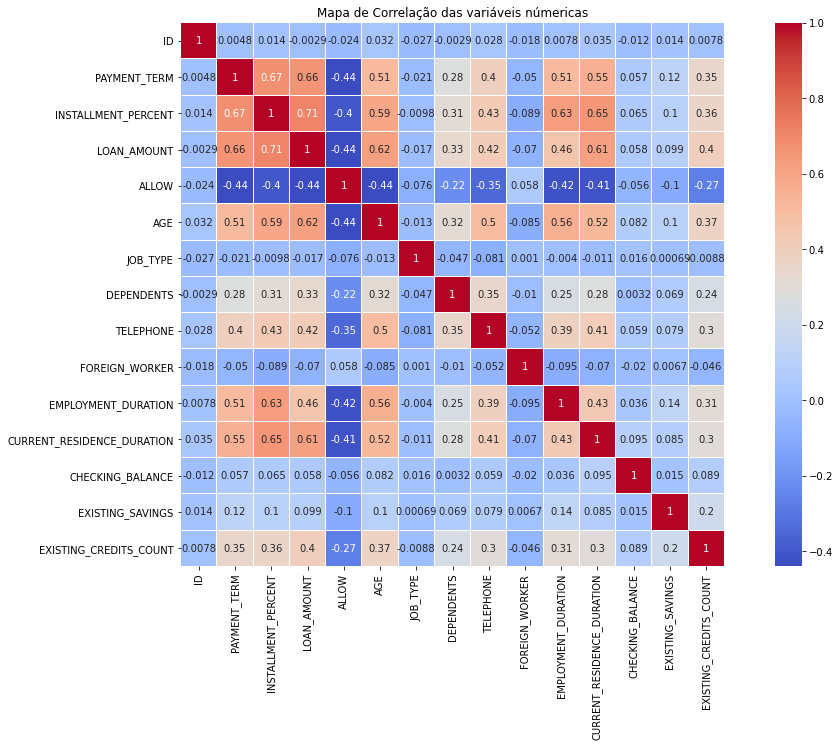

In [74]:
plt.figure(figsize = (18, 10))

sns.heatmap(df.corr(), linewidths = 0.1, vmax = 1.0, square = True, 
            cmap = 'coolwarm', linecolor = 'white', annot = True).set_title("Mapa de Correlação das variáveis númericas")

### 3. Modelagem e Avaliação de Modelos de Classificação

Com os dados prontos, podemos selecionar um modelo de Machine Learning para treinar com nossos dados. Nesse exemplo, vamos utilizar um modelo de classificação básico, o de Árvore de Decisão.

Para conseguir avaliar o desempenho do nosso modelo, vamos dividir os dados que temos entre dados de treino e de teste, e assim, após o treinamento, verificar como ele está se saindo com as predições.

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [75]:
df = df.sample(frac = 1, random_state = 123).reset_index(drop = True)

#### Técnica de balanceamento

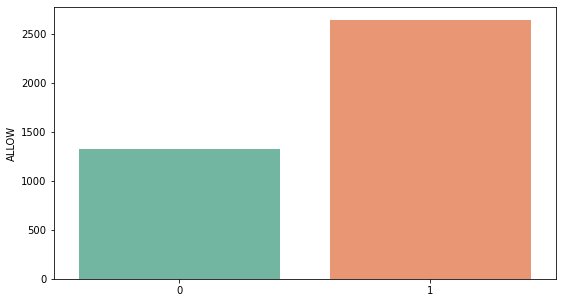

In [76]:
vc = df['ALLOW'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = vc.index, y = vc, palette = "Set2")
plt.show()

In [77]:
classe_maior = df[df.ALLOW ==  1]
classe_menor  = df[df.ALLOW ==  0]

In [78]:
display(classe_maior.shape)
classe_menor.shape

(2644, 25)

(1327, 25)

In [79]:
classe_menor_up = resample(classe_menor, replace = True, n_samples = 2644, random_state = 123)

In [80]:
df_balanced = pd.concat([classe_maior, classe_menor_up])

In [81]:
df_balanced['ALLOW'].value_counts()

0    2644
1    2644
Name: ALLOW, dtype: int64

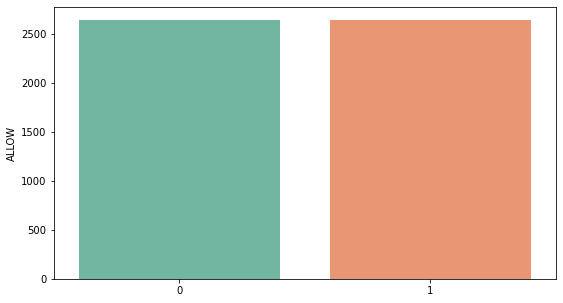

In [82]:
vc = df_balanced['ALLOW'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = vc.index, y = vc, palette = "Set2")
plt.show()

#### 3.1 Seleção de Variaveis características e variaveis-alvo

In [83]:
df_balanced.columns

Index(['ID', 'PAYMENT_TERM', 'INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'ALLOW', 'SEX', 'AGE',
       'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
       'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
       'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE', 'CREDIT_HISTORY',
       'EXISTING_SAVINGS', 'EXISTING_CREDITS_COUNT', 'CHECKING',
       'CHECKING_BALANCE_DP', 'AGE_FILTER'],
      dtype='object')

In [84]:
# Definição das colunas que serão features
X = df_balanced[["CHECKING_BALANCE", "PAYMENT_TERM", "CREDIT_HISTORY", "LOAN_PURPOSE", "LOAN_AMOUNT", "EXISTING_SAVINGS", "EMPLOYMENT_DURATION",
                 "INSTALLMENT_PERCENT", "SEX", "OTHERS_ON_LOAN", "CURRENT_RESIDENCE_DURATION", "PROPERTY", "AGE", 
                 "INSTALLMENT_PLANS", "HOUSING", "EXISTING_CREDITS_COUNT", "JOB_TYPE", 
                 "DEPENDENTS", "TELEPHONE", "FOREIGN_WORKER", 
                 "CHECKING", "CHECKING_BALANCE_DP", 
                 "AGE_FILTER"]].copy()

# Definição da variável-alvo
y = df_balanced["ALLOW"].copy()

#### 3.2 Divisão do conjunto de dados de treinamento e teste

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 123)
print("Variáveis treino =",X_train.shape, "\nTarget treino = ", y_train.shape, 
      "\nVariáveis teste =", X_val.shape, "\nTarget teste = ", y_val.shape)

Variáveis treino = (4494, 23) 
Target treino =  (4494,) 
Variáveis teste = (794, 23) 
Target teste =  (794,)


#### 3.3 Métricas de avaliação dos modelos de Classificação

In [86]:
def models_confusion_matrix(y_pred):
    sns.heatmap(confusion_matrix(y_val, y_pred), annot = True, fmt = 'd')
    plt.title("Matriz de confusão")
    plt.xlabel("Previsto")
    plt.ylabel("Valor Real")
    plt.show()

In [87]:
def classification_metrics(y_pred):
    accuracy = accuracy_score(y_val, y_pred)
    print("Acurácia:", accuracy)
    recall = recall_score(y_val, y_pred)
    print("Recall:", recall)
    precision = precision_score(y_val, y_pred)
    print("Precision:", precision)
    f1 = f1_score(y_val, y_pred)
    print("F1-Score:", f1)
    roc = roc_auc_score(y_val, y_pred)
    print("ROC:", roc)
    
    return accuracy, recall, precision, f1, roc

In [88]:
r_probs = [0 for _ in range(len(y_val))]
r_auc = roc_auc_score(y_val, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_val, r_probs)

#### 3.4 Pré-processamento dos dados

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5288 entries, 0 to 3616
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CHECKING_BALANCE            5288 non-null   float64
 1   PAYMENT_TERM                5288 non-null   float64
 2   CREDIT_HISTORY              5288 non-null   object 
 3   LOAN_PURPOSE                5288 non-null   object 
 4   LOAN_AMOUNT                 5288 non-null   float64
 5   EXISTING_SAVINGS            5288 non-null   float64
 6   EMPLOYMENT_DURATION         5288 non-null   int32  
 7   INSTALLMENT_PERCENT         5288 non-null   int32  
 8   SEX                         5288 non-null   object 
 9   OTHERS_ON_LOAN              5288 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  5288 non-null   int32  
 11  PROPERTY                    5288 non-null   object 
 12  AGE                         5288 non-null   int32  
 13  INSTALLMENT_PLANS           5288 

In [90]:
# Pré-processamento das features categóricas (OneHotEncoder)
categorical_features_ohe = [2, 3, 8, 9, 11, 13, 14, 20, 21, 22]
categorical_transformer_ohe= Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [91]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [92]:
# Pré-processamento das features numéricas (StandardScaler)
numeric_features = [0, 1, 4, 5, 6, 7, 12]
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

# StandardScaler()

In [93]:
# Juntando o pré-processamento das features categóricas e númericas
preprocessor_classification = ColumnTransformer(
    transformers=[
        ('cat_ohe', categorical_transformer_ohe, categorical_features_ohe),
        ('num', numeric_transformer, numeric_features)])

### 3.5 Modelagem dos modelos de Classificação

##### 3.5.1. Modelo base de Decision Tree

In [94]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classification', DecisionTreeClassifier(random_state = 123))])


# Utilizando o pipeline para treinar o modelo de Decision Tree na base de treinamento
dt = pipeline.fit(X_train, (y_train))
# Previsão do modelo de Decision Tree na base de teste
y_pred_dt = dt.predict(X_val)
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_pred_dt)
print (dt)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 8, 9, 11, 13, 14, 20,
                                                   21, 22]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 4, 5, 6, 7, 12])])),
                ('classification', DecisionTreeClassifier(random_state=123))])


In [95]:
# Métricas de avaliação para o modelo de Decision Tree
classification_metrics(y_pred_dt)

Acurácia: 0.8476070528967254
Recall: 0.7740259740259741
Precision: 0.8975903614457831
F1-Score: 0.8312412831241283
ROC: 0.8454481948369479


(0.8476070528967254,
 0.7740259740259741,
 0.8975903614457831,
 0.8312412831241283,
 0.8454481948369479)

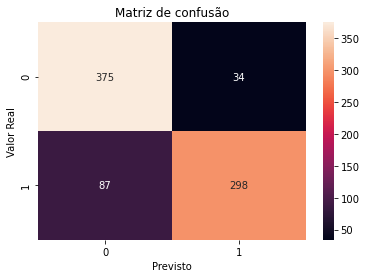

In [96]:
# Matriz de confusão para o modelo Decision Tree
models_confusion_matrix(y_pred_dt)

In [97]:
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       409
           1       0.90      0.77      0.83       385

    accuracy                           0.85       794
   macro avg       0.85      0.85      0.85       794
weighted avg       0.85      0.85      0.85       794



##### 3.5.2. Random Forest

In [98]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classification', RandomForestClassifier(random_state = 123))])


# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
rf = pipeline.fit(X_train, (y_train))
# Previsão do modelo de Random Forest na base de teste
y_pred_rf = rf.predict(X_val)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_rf)
print (rf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 8, 9, 11, 13, 14, 20,
                                                   21, 22]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 4, 5, 6, 7, 12])])),
                ('classification', RandomForestClassifier(random_state=123))])


In [99]:
# Métricas de avaliação para o modelo de Random Forest
accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf = classification_metrics(y_pred_rf)

Acurácia: 0.8879093198992444
Recall: 0.8571428571428571
Precision: 0.9065934065934066
F1-Score: 0.8811748998664887
ROC: 0.8870066363953895


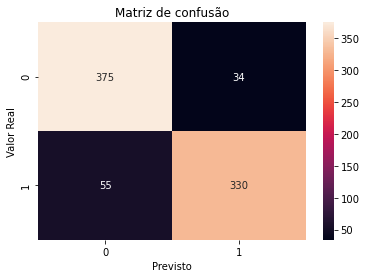

In [100]:
# Matriz de confusão para o modelo Random Forest
models_confusion_matrix(y_pred_rf)

In [101]:
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       409
           1       0.91      0.86      0.88       385

    accuracy                           0.89       794
   macro avg       0.89      0.89      0.89       794
weighted avg       0.89      0.89      0.89       794



##### 3.5.3. Extra Tree Classifier

In [102]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classification', ExtraTreesClassifier(random_state = 123))])


# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
et = pipeline.fit(X_train, (y_train))
# Previsão do modelo de Random Forest na base de teste
y_pred_et = et.predict(X_val)
fpr_et, tpr_et, _ = roc_curve(y_val, y_pred_et)
print (et)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 8, 9, 11, 13, 14, 20,
                                                   21, 22]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 4, 5, 6, 7, 12])])),
                ('classification', ExtraTreesClassifier(random_state=123))])


In [103]:
# Métricas de avaliação para o modelo de Random Forest
accuracy_et, recall_et, precision_et, f1_et, roc_et = classification_metrics(y_pred_et)

Acurácia: 0.8992443324937027
Recall: 0.8831168831168831
Precision: 0.9066666666666666
F1-Score: 0.894736842105263
ROC: 0.8987711554948717


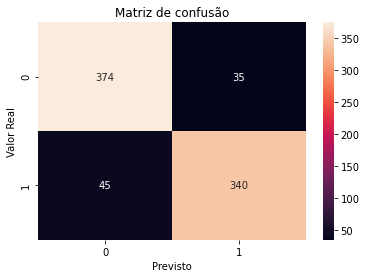

In [104]:
# Matriz de confusão para o modelo Random Forest
models_confusion_matrix(y_pred_et)

In [105]:
print(classification_report(y_val, y_pred_et))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       409
           1       0.91      0.88      0.89       385

    accuracy                           0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794



##### 3.5.3. Logistic Regression

In [106]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classification', LogisticRegression(random_state = 123))])


# Utilizando o pipeline para treinar o modelo de Logistic Regression na base de treinamento
rl = pipeline.fit(X_train, (y_train))
# Previsão do modelo de Logistic Regression na base de teste
y_pred_rl = rl.predict(X_val)
fpr_rl, tpr_rl, _ = roc_curve(y_val, y_pred_rl)
print (rl)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 8, 9, 11, 13, 14, 20,
                                                   21, 22]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 4, 5, 6, 7, 12])])),
                ('classification', LogisticRegression(random_state=123))])


C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [107]:
# Métricas de avaliação para o modelo de Logistic Regression
accuracy_rl, recall_rl, precision_rl, f1_rl, roc_rl = classification_metrics(y_pred_rl)

Acurácia: 0.7317380352644837
Recall: 0.7480519480519481
Precision: 0.7128712871287128
F1-Score: 0.7300380228136882
ROC: 0.7322166830724288


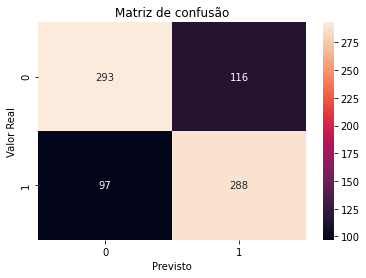

In [108]:
# Matriz de confusão para o modelo Logistic Regression
models_confusion_matrix(y_pred_rl)

In [109]:
print(classification_report(y_val, y_pred_rl))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       409
           1       0.71      0.75      0.73       385

    accuracy                           0.73       794
   macro avg       0.73      0.73      0.73       794
weighted avg       0.73      0.73      0.73       794



##### 3.5.4. LGBM

In [110]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classification', LGBMClassifier(random_state = 123))])


# Utilizando o pipeline para treinar o modelo de LGBM na base de treinamento
lgbmc = pipeline.fit(X_train, (y_train))
# Previsão do modelo de LGBM na base de teste
y_pred_lgbmc = lgbmc.predict(X_val)
fpr_lgbmc, tpr_lgbmc, _ = roc_curve(y_val, y_pred_lgbmc)
print (lgbmc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 8, 9, 11, 13, 14, 20,
                                                   21, 22]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 4, 5, 6, 7, 12])])),
                ('classification', LGBMClassifier(random_state=123))])


In [111]:
# Métricas de avaliação para o modelo de LGBM
accuracy_lgbmc, recall_lgbmc, precision_lgbmc, f1_lgbmc, roc_lgbmc = classification_metrics(y_pred_lgbmc)

Acurácia: 0.8551637279596978
Recall: 0.8363636363636363
Precision: 0.8609625668449198
F1-Score: 0.8484848484848485
ROC: 0.854612136030229


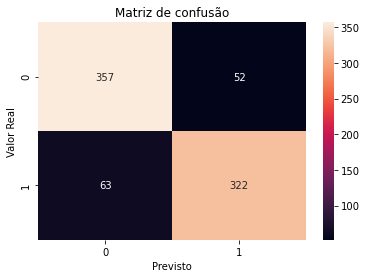

In [112]:
# Matriz de confusão para o modelo LGBM
models_confusion_matrix(y_pred_lgbmc)

In [113]:
print(classification_report(y_val, y_pred_lgbmc))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       409
           1       0.86      0.84      0.85       385

    accuracy                           0.86       794
   macro avg       0.86      0.85      0.85       794
weighted avg       0.86      0.86      0.86       794



##### 3.5.5. Neural Networks

In [114]:
def createModel():
    classifier = Sequential()
    # input layer
    classifier.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal', input_dim = 50))
    classifier.add(Dropout(0.2))
    # hidden layer
    classifier.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal'))
    classifier.add(Dropout(0.2))
    # output layer
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    # compile
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classifier

In [115]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classification', KerasClassifier(build_fn = createModel, epochs = 50, batch_size = 10))])

rn = pipeline.fit(X_train, (y_train))
# Previsão do modelo de LGBM na base de teste
y_pred_rn = rn.predict(X_val)
fpr_rn, tpr_rn, _ = roc_curve(y_val, y_pred_rn)
print (rn)

Epoch 1/50
450/450 [==============================] - 5s 1ms/step - loss: 0.5910 - binary_accuracy: 0.6992
Epoch 2/50
450/450 [==============================] - 1s 1ms/step - loss: 0.5309 - binary_accuracy: 0.7299
Epoch 3/50
450/450 [==============================] - 1s 1ms/step - loss: 0.5093 - binary_accuracy: 0.7379
Epoch 4/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4986 - binary_accuracy: 0.7497
Epoch 5/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4924 - binary_accuracy: 0.7474
Epoch 6/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4917 - binary_accuracy: 0.7494
Epoch 7/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4829 - binary_accuracy: 0.7512
Epoch 8/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4758 - binary_accuracy: 0.7546
Epoch 9/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4744 - binary_accuracy: 0.7592
Epoch 10/50
450/450 [================

C:\Users\Lucas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 8, 9, 11, 13, 14, 20,
                                                   21, 22]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 4, 5, 6, 7, 12])])),
                ('classification',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000003EF5D043C8>)])


In [116]:
# Métricas de avaliação para o modelo de rn
accuracy_rn, recall_rn, precision_rn, f1_rn, roc_rn = classification_metrics(y_pred_rn)

Acurácia: 0.760705289672544
Recall: 0.7974025974025974
Precision: 0.7326968973747017
F1-Score: 0.763681592039801
ROC: 0.7617819832978758


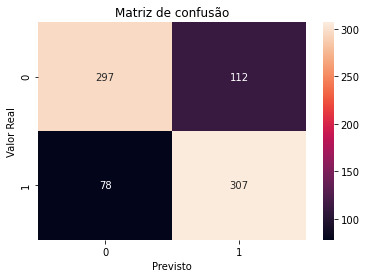

In [117]:
# Matriz de confusão para o modelo rn
models_confusion_matrix(y_pred_rn)

### 3.6 Comparando os resultados dos modelos de Classificação

In [118]:
models = [('Random Forest', accuracy_rf, recall_rf, precision_rf, f1_rf),
          ('Extra Tree', accuracy_et, recall_et, precision_et, f1_et),
          ('Logistic Regression', accuracy_rl, recall_rl, precision_rl, f1_rl),
          ('LGBM', accuracy_lgbmc, recall_lgbmc, precision_lgbmc, f1_lgbmc),
          ('Neural Networks', accuracy_rn, recall_rn, precision_rn, f1_rn)]

df_all_models = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)'])

df_all_models

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%)
0,Random Forest,0.887909,0.857143,0.906593,0.881175
1,Extra Tree,0.899244,0.883117,0.906667,0.894737
2,Logistic Regression,0.731738,0.748052,0.712871,0.730038
3,LGBM,0.855164,0.836364,0.860963,0.848485
4,Neural Networks,0.760705,0.797403,0.732697,0.763682


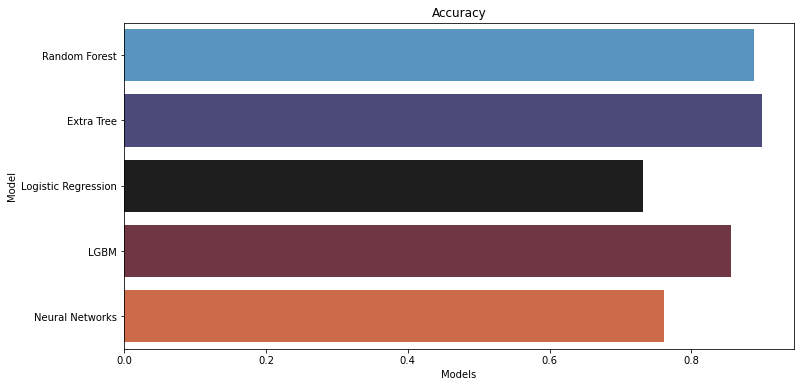

In [119]:
plt.figure(figsize = (12, 6))

sns.barplot(y = df_all_models['Model'], x = df_all_models['Accuracy (%)'], palette = 'icefire')
plt.xlabel("Models")
plt.title('Accuracy')
plt.show()

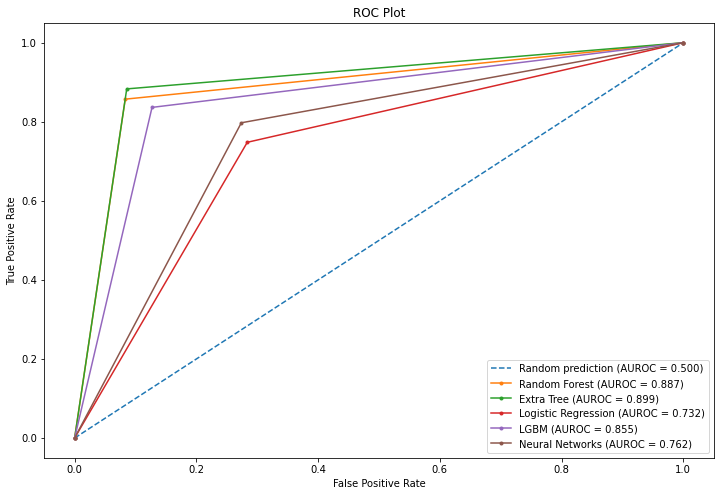

In [120]:
plt.figure(figsize = (12, 8))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest (AUROC = %0.3f)' % roc_rf)
plt.plot(fpr_et, tpr_et, marker='.', label='Extra Tree (AUROC = %0.3f)' % roc_et)
plt.plot(fpr_rl, tpr_rl, marker='.', label='Logistic Regression (AUROC = %0.3f)' % roc_rl)
plt.plot(fpr_lgbmc, tpr_lgbmc, marker='.', label='LGBM (AUROC = %0.3f)' % roc_lgbmc)
plt.plot(fpr_rn, tpr_rn, marker='.', label='Neural Networks (AUROC = %0.3f)' % roc_rn)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

### 3.8 Hiperparâmetros dos melhores modelos

##### 3.8.1 Random Forest

In [ ]:
param_grid_rf = {'max_depth': [None, 20, 30],
                 'max_features': ['sqrt', 0.2, 0.3],
                 'bootstrap': [False, True]}

model_rf = RandomForestClassifier(n_estimators = 1200, random_state = 123)

# Criando o pré-processamento e o Pipeline utilizando o RandomizerSearchCV
gridcv_rf = Pipeline(steps=[('preprocessor', preprocessor_classification),
                            ('gridsearch_rf', GridSearchCV(estimator = model_rf, param_grid = param_grid_rf, 
                                                           cv = 5, refit = True, return_train_score = True))])

# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
gridcv_rf.fit(X_train, (y_train))

In [ ]:
# verificando os melhores hiperparâmetros encontrados
gridcv_rf[1].best_params_

In [ ]:
# instanciando com os melhores hiperparâmetros
best_gridcv_rf  = gridcv_rf[1].best_estimator_

In [ ]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classifier', best_gridcv_rf)])


# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
rf_gridcv = pipeline.fit(X_train, (y_train))
# Previsão do modelo de Random Forest na base de teste
y_pred_rf_gridcv = rf_gridcv.predict(X_val)
print (rf_gridcv)

In [ ]:
# Métricas de avaliação para o modelo de LGBM
accuracy_rf_gridcv, recall_rf_gridcv, precision_rf_gridcv, f1_rf_gridcv, roc_rf_gridcv = classification_metrics(y_pred_rf_gridcv)

##### 3.8.2 Extra Tree

In [ ]:
param_grid_et = {'n_estimators': [1000, 1200, 1500],
                 'max_features': [0.2, 0.3, 0.4, 0.5],
                 'min_samples_split': [3, 4, 5, 6]}

model_et = ExtraTreesClassifier(criterion = 'gini', random_state = 123)

# Criando o pré-processamento e o Pipeline utilizando o RandomizerSearchCV
gridcv_et = Pipeline(steps=[('preprocessor', preprocessor_classification),
                            ('gridsearch_rf', GridSearchCV(estimator = model_et, param_grid = param_grid_et, 
                                                                 cv = 5, refit = True, return_train_score = True))])

# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
gridcv_et.fit(X_train, (y_train))

In [ ]:
# verificando os melhores hiperparâmetros encontrados
gridcv_et[1].best_params_

In [ ]:
# instanciando com os melhores hiperparâmetros
best_gridcv_et = gridcv_et[1].best_estimator_

In [ ]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classifier', best_gridcv_et)])


# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
et_gridcv = pipeline.fit(X_train, (y_train))
# Previsão do modelo de Random Forest na base de teste
y_pred_et_gridcv = et_gridcv.predict(X_val)
print (et_gridcv)

In [ ]:
# Métricas de avaliação para o modelo de LGBM
accuracy_et_gridcv, recall_et_gridcv, precision_et_gridcv, f1_et_gridcv, roc_et_gridcv = classification_metrics(y_pred_et_gridcv)

##### 3.8.3 LGBM

In [ ]:
param_grid_lgbm = {'n_estimators': [1200, 1500, 2000],
                   'learning_rate': [0.01, 0.02, 0.03],
                   'min_child_samples': [5, 6, 7]}


model_lg = LGBMClassifier(boosting_type = 'gbdt', objective = 'binary', metric = 'f1', random_state = 123)

# Criando o pré-processamento e o Pipeline utilizando o RandomizerSearchCV
gridcv_lg = Pipeline(steps=[('preprocessor', preprocessor_classification),
                            ('gridsearch_lg', GridSearchCV(estimator = model_lg, param_grid = param_grid_lgbm, 
                                                                 cv = 5, refit = True, return_train_score = True))])

# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
gridcv_lg.fit(X_train, (y_train))

In [ ]:
# verificando os melhores hiperparâmetros encontrados
gridcv_lg[1].best_params_

In [ ]:
# instanciando com os melhores hiperparâmetros
best_gridcv_lg  = gridcv_lg[1].best_estimator_

In [ ]:
# Criando o pré-processamento e o Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                           ('classifier', best_gridcv_lg)])


# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
lg_gridcv = pipeline.fit(X_train, (y_train))
# Previsão do modelo de Random Forest na base de teste
y_pred_lg_gridcv = lg_gridcv.predict(X_val)
print (lg_gridcv)

In [ ]:
# Métricas de avaliação para o modelo de LGBM
accuracy_lg_gridcv, recall_lg_gridcv, precision_lg_gridcv, f1_lg_gridcv, roc_lg_gridcv = classification_metrics(y_pred_lg_gridcv)

### 3.9 Treinando os melhores modelos com Validação Cruzada

#### 3.9.1 Random Forest

In [121]:
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor_classification),
                              ('model_et', ExtraTreesClassifier(n_estimators = 1200, max_features = 0.5, min_samples_split = 4,
                                                                criterion = 'gini', random_state = 123))])

# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
results_rf = cross_val_score(pipeline_rf, X, y, cv = 10, scoring = 'f1')

In [122]:
# Probabilidade de cada teste
print(f'Resultados: {results_rf}\nMédia de acertos: {results_rf.mean()}\nDesvio padrão: {results_rf.std()}')

Resultados: [0.91840607 0.90211132 0.91860465 0.90804598 0.91428571 0.93050193
 0.89866157 0.91011236 0.90909091 0.91666667]
Média de acertos: 0.9126487172630157
Desvio padrão: 0.00867833225374888


#### 3.9.2 Extra Tree

In [123]:
# Criando o pré-processamento e o Pipeline para o treinamento do modelo Extra Tree
pipeline_et = Pipeline(steps=[('preprocessor', preprocessor_classification),
                              ('model_et', ExtraTreesClassifier(n_estimators = 1200, max_features = 0.5, min_samples_split = 4,
                                                                criterion = 'gini', random_state = 123))])

# Utilizando o pipeline para treinar o modelo de Random Forest na base de treinamento
results_et = cross_val_score(pipeline_et, X, y, cv = 10, scoring = 'f1')

In [124]:
# Probabilidade de cada teste
print(f'Resultados: {results_et}\nMédia de acertos: {results_et.mean()}\nDesvio padrão: {results_et.std()}')

Resultados: [0.91840607 0.90211132 0.91860465 0.90804598 0.91428571 0.93050193
 0.89866157 0.91011236 0.90909091 0.91666667]
Média de acertos: 0.9126487172630157
Desvio padrão: 0.00867833225374888


#### 3.9.3 LGBM

In [125]:
# Criando o pré-processamento e o Pipeline para o treinamento do modelo LGBM
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor_classification),
                                ('model_lgbm', LGBMClassifier(n_estimators = 1200, num_leaves = 256, learning_rate = 0.01, boosting_type = 'gbdt', 
                                                              min_child_samples = 4, objective = 'binary', metric = 'f1',
                                                              random_state = 123))])

# Utilizando o pipeline para treinar o modelo de LGBM na base de treinamento
results_lgbm = cross_val_score(pipeline_lgbm, X, y, cv = 10, scoring = 'f1')

In [126]:
# Probabilidade de cada teste
print(f'Resultados: {results_lgbm}\nMédia de acertos: {results_lgbm.mean()}\nDesvio padrão: {results_lgbm.std()}')

Resultados: [0.91362764 0.90384615 0.93023256 0.88671875 0.89883268 0.90039841
 0.89059501 0.87334594 0.90697674 0.90421456]
Média de acertos: 0.9008788441238302
Desvio padrão: 0.014662990012180676


#### 3.9.4 Voting Classifier

In [127]:
rf_voting = RandomForestClassifier(n_estimators = 1200, criterion = 'entropy', max_depth = None, max_features = 0.2, 
                                   bootstrap = False, random_state = 123)

et_voting = ExtraTreesClassifier(n_estimators = 1200, max_features = 0.5, min_samples_split = 4, 
                                 criterion = 'gini', random_state = 123)

lg_voting = LGBMClassifier(n_estimators = 1200, num_leaves = 256, learning_rate = 0.01, boosting_type = 'gbdt', 
                           min_child_samples = 4, objective = 'binary', metric = 'f1', 
                           random_state = 123)

In [128]:
# Criando o pré-processamento e o Pipeline
pipeline_vc = Pipeline(steps=[('preprocessor', preprocessor_classification),
                              ('voting_classifier', VotingClassifier(estimators = [('rf', rf_voting), 
                                                                                   ('et', et_voting), 
                                                                                   ('lg', lg_voting)], 
                                                                                   voting = 'hard', flatten_transform = True))])
vc = pipeline_vc.fit(X_train, y_train)
# Previsão do modelo de LGBM na base de teste
y_pred_vc = vc.predict(X_val)
print(vc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 3, 8, 9, 11, 13, 14, 20,
                                                   21, 22]),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 4, 5, 6, 7, 12])])),
                ('voting_classifier',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(bootstrap=False,
                                                                      criterion='entropy',
            

In [129]:
# Métricas de avaliação para o modelo de vc
accuracy_vc, recall_vc, precision_vc, f1_vc, roc_vc = classification_metrics(y_pred_vc)

Acurácia: 0.9042821158690176
Recall: 0.8961038961038961
Precision: 0.905511811023622
F1-Score: 0.9007832898172323
ROC: 0.9040421681008478


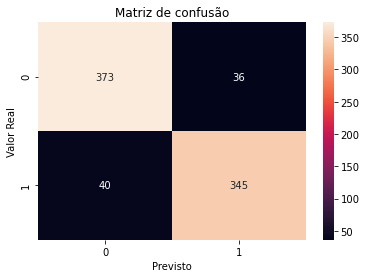

In [130]:
# Matriz de confusão para o modelo vc
models_confusion_matrix(y_pred_vc)

In [131]:
print(classification_report(y_val, y_pred_vc))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       409
           1       0.91      0.90      0.90       385

    accuracy                           0.90       794
   macro avg       0.90      0.90      0.90       794
weighted avg       0.90      0.90      0.90       794



In [132]:
# Utilizando o pipeline para treinar os modelos de Voting Classifier na base de treinamento
results_vc = cross_val_score(pipeline_vc, X, y, cv = 10, scoring = 'f1')

# Probabilidade de cada teste
print(f'Resultados: {results_vc}\nMédia de acertos: {results_vc.mean()}\nDesvio padrão: {results_vc.std()}')

Resultados: [0.91634981 0.91013384 0.94296578 0.91428571 0.91254753 0.92870906
 0.90666667 0.90130354 0.92952381 0.91729323]
Média de acertos: 0.9179778978693589
Desvio padrão: 0.011775432213517121


#### 3.9.5 Modelo Final utilizando Voting Classifier

In [133]:
# Criando o pré-processamento e o Pipeline
pipeline_final = Pipeline(steps=[('preprocessor', preprocessor_classification),
                                 ('voting_classifier', VotingClassifier(estimators = [('rf', rf_voting), 
                                                                                      ('et', et_voting), 
                                                                                      ('lg', lg_voting)], 
                                                                                      voting = 'hard', flatten_transform = True))])
vc_final = pipeline_vc.fit(X, y)

### 4. Submissão do Desafio

Com o modelo pronto, o último passo é realizar a submissão. Será aceita somente uma submissão para o desafio, então teste bem antes de fazer o envio.

MUDANÇA NO MECANISMO DE SUBMISSÃO

Por conta de problemas com os limites do plano gratuito do Watson Machine Learning, alteramos o sistema de submissão para pedir um arquivo CSV. Para entregar o desafio, você deverá alterar o arquivo com a tabela-resposta disponível nesse repositório, preenchendo o valor da coluna ALLOW em todas as 1000 linhas com as predições do seu modelo (valores 0 ou 1). Iremos avaliar sua solução nos baseando nas respostas do arquivo CSV.

Para realizar a submissão, você deverá acessar a página do desafio: https://maratona.dev/challenge/1 e enviar o arquivo CSV com as respostas, juntamente com um arquivo .zip, de até 10MB, contendo o código fonte da solução (lembre-se de remover dependências e datasets para não ocupar espaço). A página fará um teste para verificar se o arquivo CSV está no formato correto.

Você poderá acompanhar o status da submissão acessando a página do desafio, logando na sua conta.

###### 4.1 Importação do Dataset

In [134]:
answers = pd.read_csv("ANSWERS.csv")
answers_final = answers.copy()
answers.head()

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,TO_FILL
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,TO_FILL
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,TO_FILL
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,TO_FILL
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,TO_FILL


###### 4.2 Pré-Processamento do Dataset

In [135]:
answers['CHECKING'] = answers.loc[answers['CHECKING_BALANCE'] == "NO_CHECKING", 'CHECKING_BALANCE']
answers = answers.fillna(value = {'CHECKING': 'CHECKING'})

answers['CHECKING'].value_counts()

CHECKING       613
NO_CHECKING    387
Name: CHECKING, dtype: int64

In [136]:
answers.loc[answers['CHECKING_BALANCE'] == "NO_CHECKING", 'CHECKING_BALANCE'] = 0
answers.loc[answers['EXISTING_SAVINGS'] == "UNKNOWN", 'EXISTING_SAVINGS'] = 0

In [137]:
answers['CHECKING_BALANCE'] = answers['CHECKING_BALANCE'].astype(float)
answers['EXISTING_SAVINGS'] = answers['EXISTING_SAVINGS'].astype(float)
answers['AGE'] = answers['AGE'].astype(int)
answers['JOB_TYPE'] = answers['JOB_TYPE'].astype(int)
answers['DEPENDENTS'] = answers['DEPENDENTS'].astype(int)
answers['TELEPHONE'] = answers['TELEPHONE'].astype(int)
answers['FOREIGN_WORKER'] = answers['FOREIGN_WORKER'].astype(int)
answers['EMPLOYMENT_DURATION'] = answers['EMPLOYMENT_DURATION'].astype(int)
answers['CURRENT_RESIDENCE_DURATION'] = answers['CURRENT_RESIDENCE_DURATION'].astype(int)
answers['INSTALLMENT_PERCENT'] = answers['INSTALLMENT_PERCENT'].astype(int)

In [138]:
answers['CHECKING_BALANCE_DP'] = pd.cut(answers['CHECKING_BALANCE'], 
                                        bins = [-sys.maxsize -1, -1, 0, sys.maxsize], 
                                        labels = ['Negativo', 'Zerado', 'Positivo'])

answers['CHECKING_BALANCE_DP'] = answers['CHECKING_BALANCE_DP'].astype(object)

In [139]:
answers['AGE_FILTER'] = pd.cut(answers['AGE'], 
                    bins = [0, 22, 27, 33, 40, 45, 55, sys.maxsize], 
                    labels = ['Curtindo a vida', 'Contas pra pagar', 
                              'De bem com a vida', 'Familia', 
                              'Barriga de chop', 'Cuidando da saúde', 
                              'Aposentado'])

answers['AGE_FILTER'] = answers['AGE_FILTER'].astype(object)

###### 4.3 Preenchimento do dataset de submissão

In [140]:
# Definição das colunas que serão features
answers_test = answers[["CHECKING_BALANCE", "PAYMENT_TERM", "CREDIT_HISTORY", "LOAN_PURPOSE", "LOAN_AMOUNT", "EXISTING_SAVINGS", "EMPLOYMENT_DURATION",
                        "INSTALLMENT_PERCENT", "SEX", "OTHERS_ON_LOAN", "CURRENT_RESIDENCE_DURATION", "PROPERTY", "AGE", 
                        "INSTALLMENT_PLANS", "HOUSING", "EXISTING_CREDITS_COUNT", "JOB_TYPE", 
                        "DEPENDENTS", "TELEPHONE", "FOREIGN_WORKER", 
                        "CHECKING", "CHECKING_BALANCE_DP", 
                        "AGE_FILTER"]].copy()

In [141]:
preprocessor_classification.fit_transform(answers_test)

answers_final['ALLOW'] = vc_final.predict(answers_test)

###### 4.3 Salvando o dataset de submissão

In [142]:
compression_opts = dict(method = 'zip',
                        archive_name = 'ANSWERS.csv') 

answers_final.to_csv('ANSWERS.zip', index = False,
                     compression = compression_opts)

## 5. Parabéns!

Seu modelo está agora publicado. Quando estiver pronto para submeter o desafio, você pode acessar https://maratona.dev/challenge/1 , e utilizar as credenciais abaixo para realizar a submissão. Lembre-se de revisar todas as instruções no [README](https://github.com/maratonadev/desafio-1-2021) antes de submeter!